In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
df['Sentiment'] = df['Detailed Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Map sentiment scores to labels
df['Sentiment Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Group by sentiment labels and count the occurrences
sentiment_counts = df['Sentiment Label'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


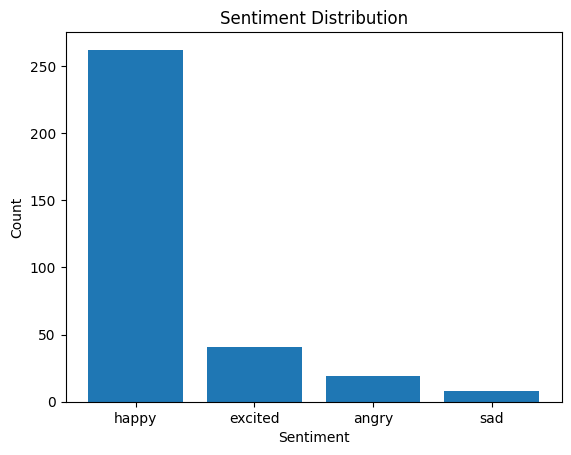

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

data = pd.read_csv('/content/amazon (1).csv')

sentiment_categories = {
    'happy': ['happy', 'fantastic', 'delighted', 'satisfied', 'good', 'best', 'delicious', 'tasty', 'refreshing'],
    'angry': ['angry', 'frustrated', 'disappointed', 'cheap','not recommended','waste of money','waste'],
    'excited': ['excited', 'thrilled', 'enthusiastic', 'love'],
    'sad': ['sad', 'unhappy', 'displeased', 'worst','very bitter','bad']
}

review_sentiments = []
for review in data['Detailed review']:
    review_sentiment = {'happy': 0, 'angry': 0, 'excited': 0, 'sad': 0}
    for category, keywords in sentiment_categories.items():
        for keyword in keywords:
            if keyword in review:
                review_sentiment[category] += 1
                break
    review_sentiments.append(max(review_sentiment, key=review_sentiment.get))

data['sentiment'] = review_sentiments

sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


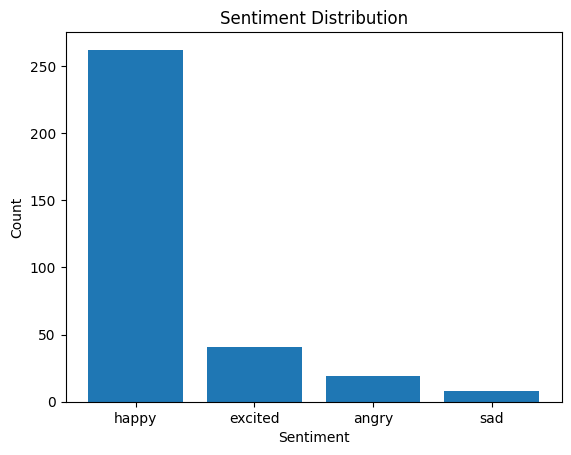

Enter your review (type 'exit' to quit): i am so excited for the new flavour
Predicted Sentiment: excited
Enter your review (type 'exit' to quit): so happy
Predicted Sentiment: happy
Enter your review (type 'exit' to quit): i didn't expect this. it is garbage
Predicted Sentiment: neutral
Enter your review (type 'exit' to quit): hate this product
Predicted Sentiment: negative


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('/content/amazon (1).csv')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define sentiment categories and associated keywords
sentiment_categories = {
    'happy': ['happy', 'fantastic', 'delighted', 'satisfied', 'good', 'best', 'delicious', 'tasty', 'refreshing'],
    'angry': ['angry', 'frustrated', 'disappointed', 'cheap', 'not recommended', 'waste of money', 'waste'],
    'excited': ['excited', 'thrilled', 'enthusiastic', 'love'],
    'sad': ['sad', 'unhappy', 'displeased', 'worst', 'very bitter', 'bad']
}

# Calculate sentiment for each review
review_sentiments = []
for review in data['Detailed review']:
    review_sentiment = {'happy': 0, 'angry': 0, 'excited': 0, 'sad': 0}
    for category, keywords in sentiment_categories.items():
        for keyword in keywords:
            if keyword in review:
                review_sentiment[category] += 1
                break
    review_sentiments.append(max(review_sentiment, key=review_sentiment.get))

# Assign sentiment to each review in the dataframe
data['sentiment'] = review_sentiments

# Visualize sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Function to predict sentiment based on user input
def predict_sentiment(input_text):
    input_vectorized = sid.polarity_scores(input_text)
    if input_vectorized['compound'] > 0:
        return 'positive'
    elif input_vectorized['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

# User interaction loop
while True:
    user_input = input("Enter your review (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting...")
        break
    else:
        predicted_sentiment = predict_sentiment(user_input)
        for category, keywords in sentiment_categories.items():
            if any(keyword in user_input for keyword in keywords):
                predicted_sentiment = category
                break
        print("Predicted Sentiment:", predicted_sentiment)
